<a href="https://colab.research.google.com/github/meriemdouider1/data_mining_project/blob/main/26ferv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn import preprocessing
import operator
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #Over sampling
import numpy as np
import time 
from itertools import cycle

from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, auc


# Load classifiers
# ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

#Reading data

In [19]:
Questionnaire = '/content/Questionnaire.xlsx'
d_Questionnaire= pd.read_excel(Questionnaire,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [20]:
Démographie  = '/content/Demographie.xlsx'
d_Démographie= pd.read_excel(Démographie,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [21]:
examination = '/content/examination.xlsx'
d_examination= pd.read_excel(examination,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [22]:
lab  = '/content/labf.xlsx'
d_lab= pd.read_excel(lab,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

#Dividing categorical and numerical

In [23]:
def split_columns(df):
    col = [c for c in df.columns if c not in ['SEQN']]
    numclasses=[]
    for c in col:
        numclasses.append(len(df[c].unique()))
    threshold=10
    np.array(numclasses).size
    categorical_variables = list(np.array(col)[np.array(numclasses) < threshold])
    numerical_variables = set(df.columns)^set(categorical_variables)
    return categorical_variables, numerical_variables

In [24]:
#questionaire data
ques_cat, ques_cont = split_columns(d_Questionnaire)
ques_obj = d_Questionnaire[list(ques_cont)].select_dtypes(include=['object']).columns
ques_cont = set(ques_cont)^set(ques_obj)


In [25]:
ques_cat

['DIQ010', 'DIQ160', 'DIQ170', 'DIQ172', 'DIQ180', 'DIQ050']

In [26]:
ques_obj

Index([], dtype='object')

In [27]:
ques_cont

{'SEQN'}

In [28]:
#demographic data
demo_cat, demo_cont = split_columns(d_Démographie)
demo_obj = d_Démographie[list(demo_cont)].select_dtypes(include=['object']).columns
demo_cont = set(demo_cont)^set(demo_obj)
#exam data
exam_cat, exam_cont = split_columns(d_examination)
exam_obj = d_examination[list(exam_cont)].select_dtypes(include=['object']).columns
exam_cont = set(exam_cont)^set(exam_obj)
#labs data
labs_cat, labs_cont = split_columns(d_lab)
labs_obj = d_lab[list(labs_cont)].select_dtypes(include=['object']).columns
labs_cont = set(labs_cont)^set(labs_obj)

In [31]:
#assert check whether we have covered all the features
assert len(ques_cat) + len(ques_cont) +len(ques_obj)  == len(d_Questionnaire.columns)
assert len(demo_cat) + len(demo_cont) +len(demo_obj) == len(d_Démographie.columns)
assert len(exam_cat) + len(exam_cont) +len(exam_obj) == len(d_examination.columns)
assert len(labs_cat) + len(labs_cont) +len(labs_obj) == len(d_lab.columns)

#Combining and Merging dataframes into single df

In [32]:
#nhs_diet
d_examination.drop(['SEQN'], axis = 1, inplace=True)
d_lab.drop(['SEQN'], axis = 1, inplace=True)
d_Questionnaire.drop(['SEQN'], axis = 1, inplace=True)

#joining all dataframes into single

df = pd.concat([d_Démographie, d_examination], axis=1, join='inner')
df = pd.concat([df, d_lab], axis=1, join='inner')
df = pd.concat([df, d_Questionnaire], axis=1, join='inner')

In [33]:
df.head()

,SEQN,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,BMDSTATS,BMXWT,BMXHT,...,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC,LBXBCR,LBDBCRSI,LBDBCRLC,LBXBCO,LBDBCOSI,LBDBCOLC,LBDSF5LC,LBXSF6SI,LBDSF6LC,LBXGH,WTSAF2YR,LBXGLU,LBDGLUSI,LBDHDD,LBDHDDSI,LBXHA,LBXHBC,LBXHBS,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050
0,93703,2,2,2,5,6,2,1,1,4,1,1,1,2,1,2,2,1,2,2,5,5,3,0,0,1,2,3,1,3,9246.491865,8539.731348,2,145,15,15,5.00,1,13.7,88.6,...,1.0,3.4,0.6,4.2,0.2,0.1,5.48,11.9,36.7,67.0,21.7,32.4,15.6,309,7.9,0.0,0.29,5.58,1,0.20,3.39,0,1,1.160,0,6.2,0.000000,97,5.38,60,1.55,1,1,1,2,2,2,2,2,2
1,93704,2,1,2,3,3,1,1,1,4,1,1,1,2,1,2,2,1,2,2,4,4,2,0,0,1,2,3,1,2,37338.768343,42566.614750,1,143,15,15,5.00,1,13.9,94.2,...,0.8,1.5,0.6,3.7,0.3,0.0,5.24,16.3,47.0,89.7,31.1,34.7,12.2,233,6.6,0.0,0.29,5.58,1,0.14,2.38,0,1,0.831,0,5.2,0.000000,97,5.38,47,1.22,2,2,2,2,2,2,2,2,2
2,93705,2,2,66,4,4,2,1,1,2,3,1,2,2,1,2,2,1,2,2,1,1,0,0,1,2,4,1,2,2,8614.571172,8338.419786,2,145,3,3,0.82,1,79.5,158.3,...,0.5,4.2,0.7,6.1,0.2,0.1,5.02,14.5,42.1,83.9,28.9,34.4,13.6,348,8.5,0.2,0.29,5.58,1,0.14,2.38,0,1,3.620,0,5.6,0.000000,97,5.38,68,1.76,2,2,2,2,2,2,2,1,2
3,93706,2,1,18,5,6,2,1,1,4,1,1,2,2,1,2,2,1,2,2,5,5,0,0,1,1,4,3,1,2,8548.632619,8723.439814,2,134,15,15,5.00,1,66.3,175.7,...,0.7,1.9,0.4,3.6,0.1,0.0,4.59,13.2,39.9,86.8,28.8,33.1,13.4,226,9.1,0.2,0.29,5.58,1,0.16,2.72,0,0,1.220,0,6.2,25653.677102,122,6.77,88,2.28,1,1,1,2,2,2,2,2,2
4,93707,2,1,13,5,7,2,1,1,4,1,1,1,2,1,2,2,1,2,2,7,7,0,3,0,1,3,2,1,3,6769.344567,7064.609730,1,138,10,10,1.88,1,45.4,158.4,...,0.6,1.9,0.5,4.8,0.1,0.0,5.13,15.4,45.5,88.8,30.0,33.8,15.7,228,9.0,0.0,0.70,13.46,0,0.34,5.77,0,1,1.940,0,6.3,0.000000,97,5.38,65,1.68,1,2,2,2,2,2,2,2,2


In [34]:
df.shape

(7936, 370)

In [35]:
df.describe()

,SEQN,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,BMDSTATS,BMXWT,BMXHT,...,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC,LBXBCR,LBDBCRSI,LBDBCRLC,LBXBCO,LBDBCOSI,LBDBCOLC,LBDSF5LC,LBXSF6SI,LBDSF6LC,LBXGH,WTSAF2YR,LBXGLU,LBDGLUSI,LBDHDD,LBDHDDSI,LBXHA,LBXHBC,LBXHBS,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050
count,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,...,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.00000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.0,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000
mean,97670.500000,1.942414,1.511341,34.363029,3.235761,3.500378,1.543221,1.243826,1.117692,3.714214,2.021421,1.102949,1.657132,1.967112,1.091230,1.998236,1.972656,1.051537,1.994330,1.983619,3.710559,3.589214,0.494960,0.877772,0.489541,1.498614,2.862273,2.047001,1.463458,2.057208,34658.037726,34695.011004,1.517641,140.990927,12.567540,12.326865,2.719984,1.134955,64.789491,156.791898,...,0.754687,2.383606,0.575290,4.033556,0.204360,0.045917,4.742344,13.737273,40.903919,86.916003,29.231578,33.578427,13.735522,255.413306,8.091520,0.08503,0.317840,6.115190,0.946069,0.173364,2.944803,0.003780,0.937122,1.462138,0.0,5.681502,34331.708539,102.392641,5.680988,52.578503,1.359638,1.338080,1.948841,1.732863,1.923891,1.939012,1.908518,1.879032,1.844380,1.972530
std,2291.070201,0.232973,0.499903,25.503013,1.281829,1.705324,0.498160,1.679004,0.466398,0.987753,2.638199,0.303911,0.474698,0.178355,0.287954,0.041967,0.163093,0.221105,0.075093,0.126944,1.711820,1.755174,0.801998,1.061169,0.752156,0.500030,0.807843,0.637563,0.718063,0.497762,41429.214937,43485.753638,0.499720,4.199099,16.781947,16.758066,1.737661,0.502854,32.681992,21.463467,...,0.316667,4.174485,0.202014,1.654518,0.180871,0.051771,0.462687,1.445707,3.967844,6.138082,2.395057,0.892629,1.216110,65.320742,0.869265,0.07614,0.213558,4.106382,0.225897,0.324093,5.499527,0.061371,0.242759,1.357807,0.0,0.919355,80520.565172,22.596598,1.255185,13.723671,0.354919,0.473352,0.220908,0.442492,0.373007,0.326614,0.450664,0.730458,1.136927,0.183782
min,93703.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2571.068712,0.000000,1.000000,134.000000,1.000000,1.000000,0.000000,1.000000,3.200000,78.300000,...,0.100000,0.400000,0.100000,0.400000,0.000000,0.000000,2.320000,6.400000,23.000000,35.400000,12.400000,25.200000,11.300000,8.000000,5.400000,0.00000,0.290000,5.580000,0.000000,0.040000,0.680000,0.000000,0.000000,0.113000,0.0,3.800000,0.000000,47.000000,2.610000,10.000000,0.260000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,95686.750000,2.000000,1.000000,11.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.

**tInitial cleaning - Removing na's if in rows and columns from the merged dataframe** 

In [36]:
lst = df.columns[df.isna().all()].tolist()
df.dropna(axis=1, how='all',inplace=True)
df.dropna(axis=0, how='all',inplace=True)
df.shape

(7936, 370)

****Output label assignment****

In [37]:
df.loc[(df['LBXGLU'] < 100) , 'Diabetes'] = 0
df.loc[((df['LBXGLU'] >= 100) & (df['LBXGH'] <= 125)) , 'Diabetes'] = 1
df.loc[(df['LBXGLU'] > 125) , 'Diabetes'] = 2

In [38]:
df.loc[((df.Diabetes.isna()) & (df.DIQ010 == 1)), 'Diabetes'] = 2
df.loc[((df.Diabetes.isna()) & (df.DIQ010 == 3)), 'Diabetes'] = 1
df.loc[((df.Diabetes.isna()) & (df.DIQ010 == 2)), 'Diabetes'] = 0

In [39]:
##removing the rows with nan diabetes values 
df = df[np.isfinite(df['Diabetes'])]

In [41]:
df.shape

(7936, 371)

In [42]:
df.Diabetes.value_counts()

0.0    6180
1.0    1346
2.0     410
Name: Diabetes, dtype: int64

Text(0, 0.5, 'Number of counts')

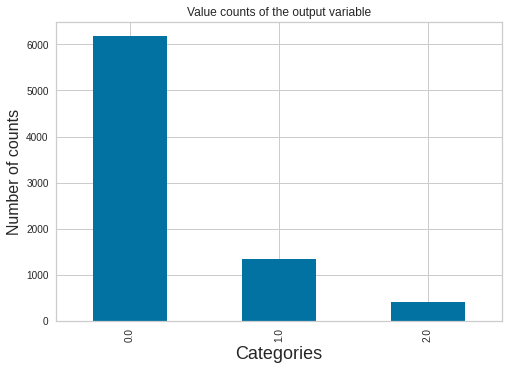

In [43]:
pd.value_counts(df['Diabetes']).plot(kind="bar", title='Value counts of the output variable')
plt.xlabel('Categories', fontsize=18)
plt.ylabel('Number of counts', fontsize=16)

#Dividing the merged df variables

In [46]:
cat_vars = ques_cat+demo_cat+exam_cat+labs_cat
cat_vars = [x for x in cat_vars if x not in lst]
num_vars = list(ques_cont)+list(demo_cont)+list(exam_cont)+list(labs_cont)
num_vars = [x for x in num_vars if x not in lst]
obj_vars = list(set(df.columns)^set(cat_vars)^set(num_vars))

In [51]:
X = df.drop(labels = ['Diabetes','LBXGLU','DIQ010'], axis=1).values
y = df['Diabetes'].values
X = StandardScaler().fit_transform(X)

In [53]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Diabetes']]], axis = 1)

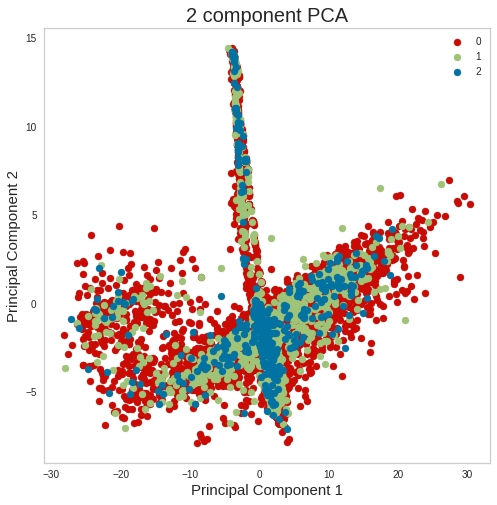

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diabetes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [55]:
pca.explained_variance_ratio_

array([0.14949525, 0.06209984])

In [57]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df[['Diabetes']]], axis = 1)

In [58]:
pca.explained_variance_ratio_

array([0.14949525, 0.06209984, 0.04451715])

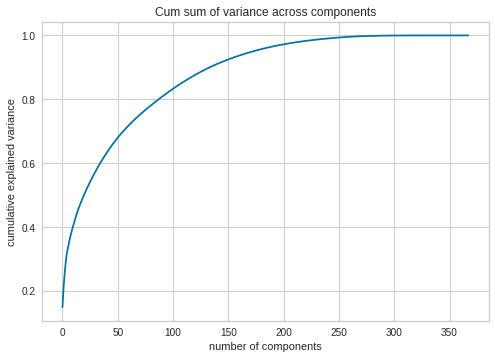

In [59]:
## obtain all the components and plot the cumulatie explained variance with respect to the number of components
pca =  PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cum sum of variance across components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');